<a href="https://colab.research.google.com/github/DhutaAzikira/LSTM-Model/blob/main/Copy_of_Crypt_1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras
import keras_tuner
from keras_tuner import RandomSearch

#BaseModel


##Data Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Model/Bitcoin Historical Data.csv')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,60979.2,"61,480.50","61,790.00","60,779.00",36.39K,-0.81%
1,05/12/2024,61480.0,"60,826.60","61,847.70","60,647.10",27.40K,1.07%
2,05/11/2024,60826.6,"60,796.80","61,487.50","60,499.30",27.50K,0.05%
3,05/10/2024,60796.9,"63,074.30","63,454.30","60,251.80",79.33K,-3.61%
4,05/09/2024,63075.0,"61,207.30","63,413.30","60,671.40",64.22K,3.05%


In [ ]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1817,05/23/2019,7852.1,"7,637.20","7,939.10","7,486.80",815.14K,2.83%
1818,05/22/2019,7635.7,"7,928.70","7,999.00","7,545.90",821.40K,-3.72%
1819,05/21/2019,7930.3,"7,965.00","8,056.80","7,813.20",804.88K,-0.44%
1820,05/20/2019,7965.3,"8,156.40","8,156.40","7,604.00",958.81K,-2.35%
1821,05/19/2019,8157.2,"7,261.90","8,253.40","7,252.30",1.08M,12.32%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1822 non-null   object 
 1   Price     1822 non-null   float64
 2   Open      1822 non-null   object 
 3   High      1822 non-null   object 
 4   Low       1822 non-null   object 
 5   Vol.      1822 non-null   object 
 6   Change %  1822 non-null   object 
dtypes: float64(1), object(6)
memory usage: 99.8+ KB


In [ ]:
df = df.iloc[::-1]

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
1821,05/19/2019,8157.2,"7,261.90","8,253.40","7,252.30",1.08M,12.32%
1820,05/20/2019,7965.3,"8,156.40","8,156.40","7,604.00",958.81K,-2.35%
1819,05/21/2019,7930.3,"7,965.00","8,056.80","7,813.20",804.88K,-0.44%
1818,05/22/2019,7635.7,"7,928.70","7,999.00","7,545.90",821.40K,-3.72%
1817,05/23/2019,7852.1,"7,637.20","7,939.10","7,486.80",815.14K,2.83%
...,...,...,...,...,...,...,...
4,05/09/2024,63075.0,"61,207.30","63,413.30","60,671.40",64.22K,3.05%
3,05/10/2024,60796.9,"63,074.30","63,454.30","60,251.80",79.33K,-3.61%
2,05/11/2024,60826.6,"60,796.80","61,487.50","60,499.30",27.50K,0.05%
1,05/12/2024,61480.0,"60,826.60","61,847.70","60,647.10",27.40K,1.07%


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2019-05-19 to 2024-05-13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1822 non-null   float64
 1   Open      1822 non-null   object 
 2   High      1822 non-null   object 
 3   Low       1822 non-null   object 
 4   Vol.      1822 non-null   object 
 5   Change %  1822 non-null   object 
dtypes: float64(1), object(5)
memory usage: 99.6+ KB


In [ ]:
print(df.dtypes)

Price       float64
Open         object
High         object
Low          object
Vol.         object
Change %     object
dtype: object


In [ ]:
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

In [ ]:
def convert_volume(volume):
    if isinstance(volume, str):
        if 'K' in volume:
            return float(volume.replace('K', '')) * 1000
        elif 'M' in volume:
            return float(volume.replace('M', '')) * 1000000
        elif 'B' in volume:
            return float(volume.replace('B', '')) * 1000000000
    return float(volume)

In [ ]:
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [ ]:
df = df.drop('Change %', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1822 entries, 2019-05-19 to 2024-05-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1822 non-null   float64
 1   Open    1822 non-null   float64
 2   High    1822 non-null   float64
 3   Low     1822 non-null   float64
 4   Vol.    1822 non-null   float64
dtypes: float64(5)
memory usage: 85.4 KB


In [ ]:
df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2019-05-19,8157.2,7261.9,8253.4,7252.3,1080000.0
2019-05-20,7965.3,8156.4,8156.4,7604.0,958810.0
2019-05-21,7930.3,7965.0,8056.8,7813.2,804880.0
2019-05-22,7635.7,7928.7,7999.0,7545.9,821400.0
2019-05-23,7852.1,7637.2,7939.1,7486.8,815140.0


In [ ]:
df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-05-09,63075.0,61207.3,63413.3,60671.4,64220.0
2024-05-10,60796.9,63074.3,63454.3,60251.8,79330.0
2024-05-11,60826.6,60796.8,61487.5,60499.3,27500.0
2024-05-12,61480.0,60826.6,61847.7,60647.1,27400.0
2024-05-13,60979.2,61480.5,61790.0,60779.0,36390.0


Text(0.5, 1.0, 'Bitcoin Price 2019/05/19 - 2024-05-13')

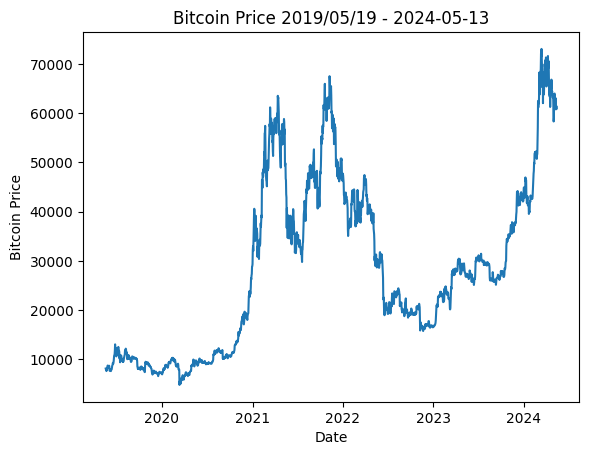

In [ ]:
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price 2019/05/19 - 2024-05-13')

##Checkpoint

In [ ]:
#Checkpoint
cleaned_df = df

In [ ]:
#Checkpoint
df = cleaned_df

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Price'
    return np.array(x), np.array(y)

seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

In [ ]:
# Split the data into training and testing sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(x_train[1].shape)

(60, 5)


In [ ]:
print(x_test[1].shape)

(60, 5)


##Building the Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 15s 209ms/step - loss: 0.0208 - val_loss: 8.9565e-04
Epoch 2/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0041 - val_loss: 4.8190e-04
Epoch 3/50
36/36 [==============================] - 2s 66ms/step - loss: 0.0039 - val_loss: 4.6148e-04
Epoch 4/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0035 - val_loss: 9.0080e-04
Epoch 5/50
36/36 [==============================] - 2s 65ms/step - loss: 0.0032 - val_loss: 4.9545e-04
Epoch 6/50
36/36 [==============================] - 4s 99ms/step - loss: 0.0026 - val_loss: 4.5720e-04
Epoch 7/50
36/36 [==============================] - 3s 90ms/step - loss: 0.0030 - val_loss: 3.5239e-04
Epoch 8/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0024 - val_loss: 5.5827e-04
Epoch 9/50
36/36 [==============================] - 2s 64ms/step - loss: 0.0027 - val_loss: 4.1389e-04
Epoch 10/50
36/36 [==============================] - 2s 62ms/step - los

In [ ]:
# Save the initial model
model.save('initial_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the initial model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]


12/12 [==============================] - 1s 41ms/step


In [ ]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f"Initial Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Initial Model Metrics:
MSE: 3093918.942556518
MAE: 1137.3578239882893
RMSE: 1758.9539341769353


<ipython-input-40-dd46305fe8b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


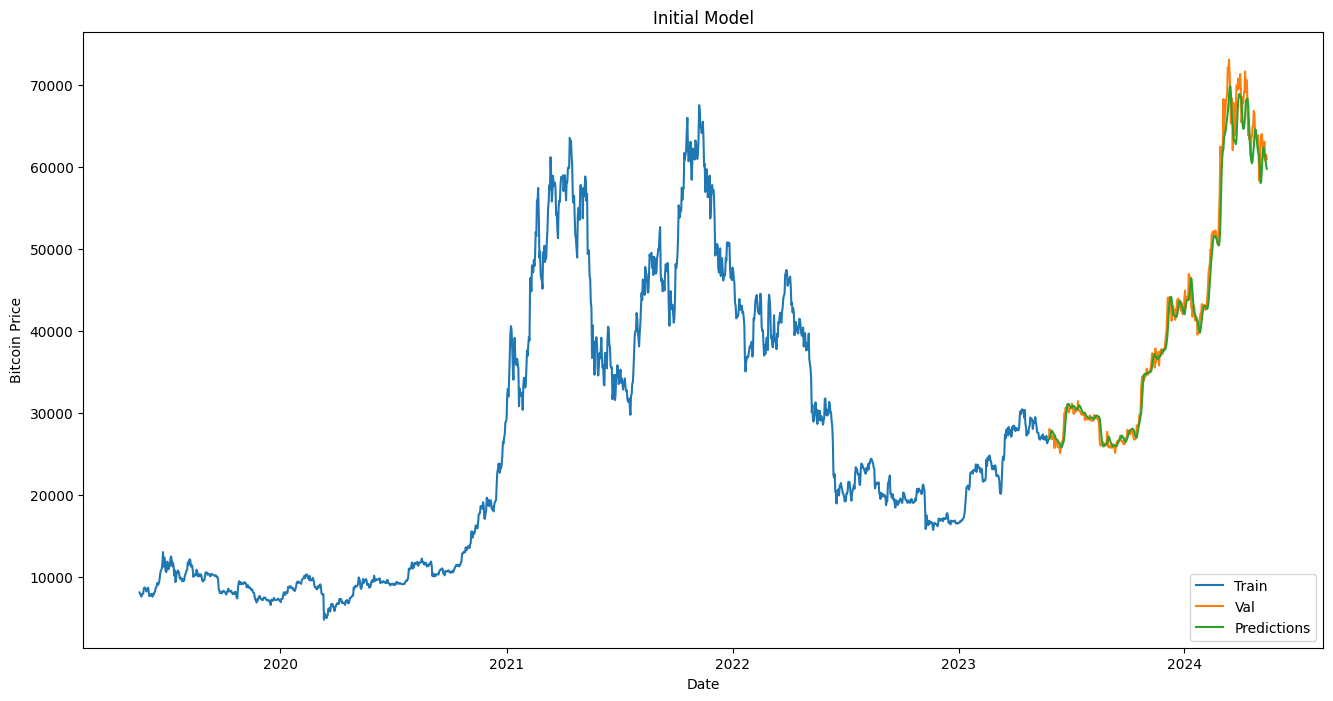

In [ ]:
# Plot the results
train = df[:split+seq_length]
valid = df[split+seq_length:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Initial Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

##Hyperparameter Tuning

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', min_value=25, max_value=200, step=25),
                   return_sequences=True,
                   input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=25, max_value=200, step=25),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

In [ ]:
# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='bitcoin_lstm_tuning')

In [ ]:
# Adding batch size and epochs to the tuner
tuner.search_space_summary()

Search space summary
Default search space size: 6
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 100, 'step': 25, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
# Run the hyperparameter search
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 04m 19s]
val_loss: 0.00016194730415008962

Best val_loss So Far: 0.00012172128481324762
Total elapsed time: 00h 46m 02s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Display the best hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units1')}.
The optimal dropout rate for the first layer is {best_hps.get('dropout1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units2')}.
The optimal dropout rate for the second layer is {best_hps.get('dropout2')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 25.
The optimal dropout rate for the first layer is 0.1.
The optimal number of units in the second LSTM layer is 175.
The optimal dropout rate for the second layer is 0.1.
The optimal number of units in the dense layer is 100.
The optimal optimizer is adam.



In [ ]:
# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
36/36 [==============================] - 12s 215ms/step - loss: 0.0156 - val_loss: 4.2172e-04
Epoch 2/50
36/36 [==============================] - 5s 136ms/step - loss: 0.0024 - val_loss: 3.8694e-04
Epoch 3/50
36/36 [==============================] - 5s 128ms/step - loss: 0.0021 - val_loss: 4.7560e-04
Epoch 4/50
36/36 [==============================] - 8s 213ms/step - loss: 0.0020 - val_loss: 4.6166e-04
Epoch 5/50
36/36 [==============================] - 5s 137ms/step - loss: 0.0019 - val_loss: 4.9759e-04
Epoch 6/50
36/36 [==============================] - 6s 168ms/step - loss: 0.0019 - val_loss: 3.2948e-04
Epoch 7/50
36/36 [==============================] - 6s 173ms/step - loss: 0.0016 - val_loss: 7.9876e-04
Epoch 8/50
36/36 [==============================] - 5s 130ms/step - loss: 0.0018 - val_loss: 5.4453e-04
Epoch 9/50
36/36 [==============================] - 7s 199ms/step - loss: 0.0017 - val_loss: 2.9707e-04
Epoch 10/50
36/36 [==============================] - 5s 134ms/s

In [ ]:
# Save the best tuned model
best_model.save('best_tuned_lstm_model.h5')

In [ ]:
# Evaluate the best tuned model
predictions = best_model.predict(x_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:, 0]

12/12 [==============================] - 2s 41ms/step


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Best Tuned Model Metrics:
MSE: 2329779.531785233
MAE: 1214.3632321371656
RMSE: 1526.3615337741032


<ipython-input-54-4017352090fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


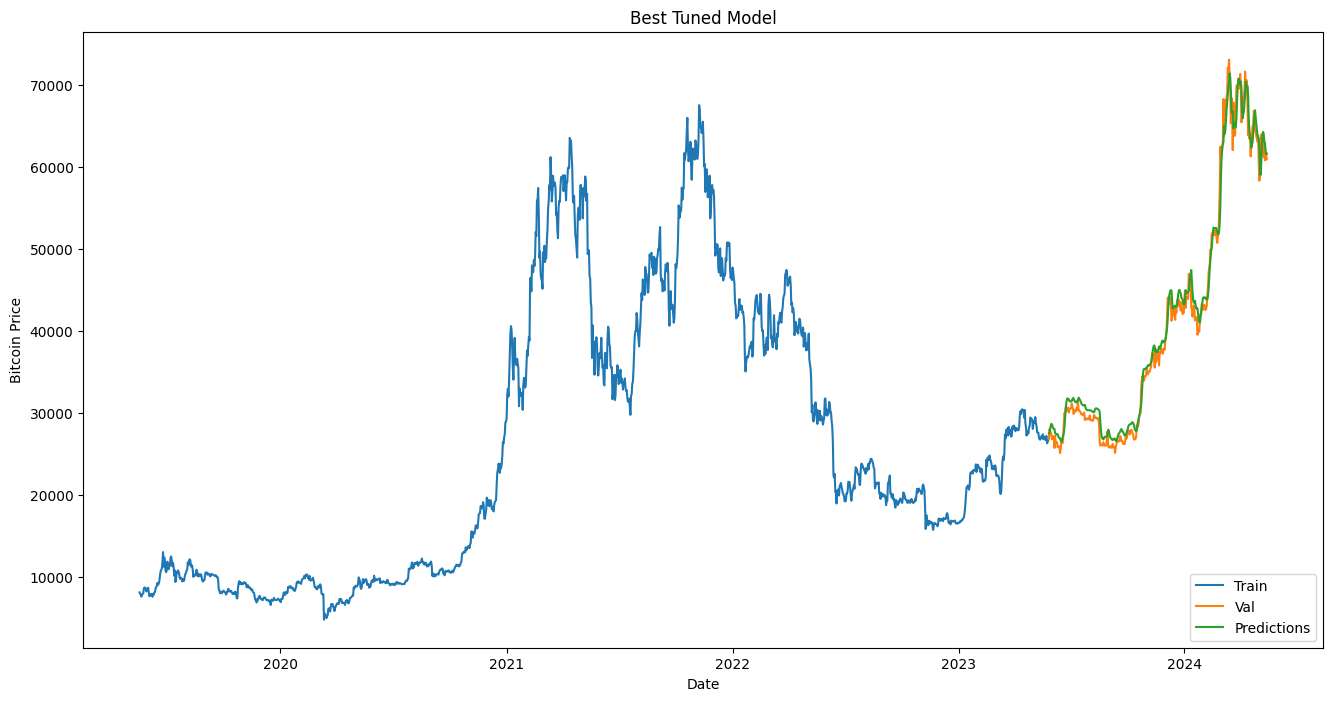

In [ ]:
# Plot the results for the best tuned model
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Best Tuned Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#5 Dataset Model LSTM

##Import Dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Model/Bitcoin Historical Data.csv')
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,60979.2,"61,480.50","61,790.00","60,779.00",36.39K,-0.81%
1,05/12/2024,61480.0,"60,826.60","61,847.70","60,647.10",27.40K,1.07%
2,05/11/2024,60826.6,"60,796.80","61,487.50","60,499.30",27.50K,0.05%
3,05/10/2024,60796.9,"63,074.30","63,454.30","60,251.80",79.33K,-3.61%
4,05/09/2024,63075.0,"61,207.30","63,413.30","60,671.40",64.22K,3.05%
...,...,...,...,...,...,...,...
1817,05/23/2019,7852.1,"7,637.20","7,939.10","7,486.80",815.14K,2.83%
1818,05/22/2019,7635.7,"7,928.70","7,999.00","7,545.90",821.40K,-3.72%
1819,05/21/2019,7930.3,"7,965.00","8,056.80","7,813.20",804.88K,-0.44%
1820,05/20/2019,7965.3,"8,156.40","8,156.40","7,604.00",958.81K,-2.35%


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Model/Ethereum Historical Data.csv')
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,2886.09,"2,929.36","2,943.02","2,865.08",196.93K,-1.48%
1,05/12/2024,2929.35,"2,912.56","2,953.92","2,903.16",111.77K,0.58%
2,05/11/2024,2912.56,"2,909.86","2,943.58","2,889.62",144.62K,0.09%
3,05/10/2024,2909.86,"3,036.32","3,052.94","2,882.82",355.90K,-4.16%
4,05/09/2024,3036.32,"2,974.92","3,057.07","2,953.21",248.78K,2.06%
...,...,...,...,...,...,...,...
1817,05/23/2019,244.68,244.35,247.3,231.89,13.07M,0.14%
1818,05/22/2019,244.34,253.7,259.7,241.68,10.83M,-3.71%
1819,05/21/2019,253.76,250.72,261.59,246.85,10.24M,1.21%
1820,05/20/2019,250.72,259.68,259.68,238.64,12.38M,-3.43%


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Model/Solana Historical Data.csv')
df3

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,138.642,143.417,145.722,138.008,3.05M,-3.33%
1,05/12/2024,143.417,145.389,147.731,142.893,1.92M,-1.36%
2,05/11/2024,145.391,146.032,147.551,143.254,3.06M,-0.44%
3,05/10/2024,146.032,152.814,155.560,144.769,5.90M,-4.43%
4,05/09/2024,152.795,142.169,153.202,140.643,5.30M,7.45%
...,...,...,...,...,...,...,...
1389,07/22/2020,1.046,1.004,1.087,1.003,NaN,4.17%
1390,07/21/2020,1.004,0.874,1.005,0.874,NaN,-27.41%
1391,07/15/2020,1.383,1.115,1.384,1.115,NaN,24.00%
1392,07/14/2020,1.115,1.279,1.279,1.114,NaN,-12.78%


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Model/XRP Historical Data.csv')
df4

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,0.4927,0.4993,0.5028,0.4869,258.41M,-1.33%
1,05/12/2024,0.4993,0.5059,0.5084,0.4969,174.99M,-1.30%
2,05/11/2024,0.5059,0.5021,0.5074,0.5007,188.09M,0.76%
3,05/10/2024,0.5021,0.5209,0.5209,0.4979,587.73M,-3.63%
4,05/09/2024,0.5210,0.5170,0.5237,0.5092,480.48M,0.78%
...,...,...,...,...,...,...,...
1816,05/23/2019,0.3797,0.3731,0.3825,0.3635,1.54B,1.78%
1817,05/22/2019,0.3731,0.3954,0.4091,0.3693,1.88B,-5.65%
1818,05/21/2019,0.3954,0.3955,0.4054,0.3873,1.54B,-0.02%
1819,05/20/2019,0.3955,0.4154,0.4154,0.3814,2.10B,-4.79%


In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Model/BNB Historical Data.csv')
df5

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,589.18,594.78,596.68,585.67,314.99K,-0.94%
1,05/12/2024,594.78,592.20,599.38,587.61,199.93K,0.44%
2,05/11/2024,592.20,585.60,594.40,581.52,219.29K,1.13%
3,05/10/2024,585.60,596.69,596.99,582.13,307.59K,-1.86%
4,05/09/2024,596.69,588.60,603.31,586.71,485.18K,1.37%
...,...,...,...,...,...,...,...
1823,05/17/2019,25.80,26.29,26.65,23.40,3.43M,-1.87%
1824,05/16/2019,26.29,26.82,27.74,25.08,4.20M,-1.98%
1825,05/15/2019,26.82,23.64,27.40,23.46,3.43M,13.45%
1826,05/14/2019,23.64,23.50,24.49,22.62,3.82M,0.60%


In [ ]:
def preprocess_data(df):
    df = df.iloc[::-1]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
    df['Vol.'] = df['Vol.'].apply(convert_volume)
    df = df.drop('Change %', axis=1)
    return df

In [ ]:
def preprocess_data_low(df):
    df = df.iloc[::-1]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Open'] = df['Open'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Vol.'] = df['Vol.'].apply(convert_volume)
    df['Vol.'] = df['Vol.'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
    df = df.drop('Change %', axis=1)
    return df

In [ ]:
def convert_volume(volume):
    if isinstance(volume, str):
        if 'K' in volume:
            return float(volume.replace('K', '')) * 1000
        elif 'M' in volume:
            return float(volume.replace('M', '')) * 1000000
        elif 'B' in volume:
            return float(volume.replace('B', '')) * 1000000000
    return float(volume)

In [ ]:
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,2886.09,"2,929.36","2,943.02","2,865.08",196.93K,-1.48%
1,05/12/2024,2929.35,"2,912.56","2,953.92","2,903.16",111.77K,0.58%
2,05/11/2024,2912.56,"2,909.86","2,943.58","2,889.62",144.62K,0.09%
3,05/10/2024,2909.86,"3,036.32","3,052.94","2,882.82",355.90K,-4.16%
4,05/09/2024,3036.32,"2,974.92","3,057.07","2,953.21",248.78K,2.06%
...,...,...,...,...,...,...,...
1817,05/23/2019,244.68,244.35,247.3,231.89,13.07M,0.14%
1818,05/22/2019,244.34,253.7,259.7,241.68,10.83M,-3.71%
1819,05/21/2019,253.76,250.72,261.59,246.85,10.24M,1.21%
1820,05/20/2019,250.72,259.68,259.68,238.64,12.38M,-3.43%


In [ ]:
df3

,Date,Price,Open,High,Low,Vol.,Change %
0,05/13/2024,138.642,143.417,145.722,138.008,3.05M,-3.33%
1,05/12/2024,143.417,145.389,147.731,142.893,1.92M,-1.36%
2,05/11/2024,145.391,146.032,147.551,143.254,3.06M,-0.44%
3,05/10/2024,146.032,152.814,155.560,144.769,5.90M,-4.43%
4,05/09/2024,152.795,142.169,153.202,140.643,5.30M,7.45%
...,...,...,...,...,...,...,...
1389,07/22/2020,1.046,1.004,1.087,1.003,NaN,4.17%
1390,07/21/2020,1.004,0.874,1.005,0.874,NaN,-27.41%
1391,07/15/2020,1.383,1.115,1.384,1.115,NaN,24.00%
1392,07/14/2020,1.115,1.279,1.279,1.114,NaN,-12.78%


##Pre-Processing

In [ ]:
# Load and preprocess data for multiple cryptocurrencies
btc_df = preprocess_data(df1)
eth_df = preprocess_data(df2)

In [ ]:
sol_df = preprocess_data_low(df3)
xrp_df = preprocess_data_low(df4)
bnb_df = preprocess_data_low(df5)

In [ ]:
ticker_list = [btc_df, eth_df, sol_df, xrp_df, bnb_df]

for x in ticker_list:
  print(x.shape)

(1822, 5)
(1822, 5)
(1394, 5)
(1821, 5)
(1828, 5)


In [ ]:
# Merge dataframes on Date
combined_df = btc_df[['Price','Open', 'High', 'Low', 'Vol.']].rename(columns=lambda x: f"BTC_{x}")
combined_df = combined_df.join(eth_df[['Price','Open', 'High', 'Low', 'Vol.']].rename(columns=lambda x: f"ETH_{x}"), how='inner')
combined_df = combined_df.join(sol_df[['Price','Open', 'High', 'Low', 'Vol.']].rename(columns=lambda x: f"SOL_{x}"), how='inner')
combined_df = combined_df.join(xrp_df[['Price','Open', 'High', 'Low', 'Vol.']].rename(columns=lambda x: f"XRP_{x}"), how='inner')
combined_df = combined_df.join(bnb_df[['Price','Open', 'High', 'Low', 'Vol.']].rename(columns=lambda x: f"BNB_{x}"), how='inner')

In [ ]:
combined = combined_df

In [ ]:
print(combined.shape)

(1393, 25)


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393 entries, 2020-07-13 to 2024-05-13
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_Price  1393 non-null   float64
 1   BTC_Open   1393 non-null   float64
 2   BTC_High   1393 non-null   float64
 3   BTC_Low    1393 non-null   float64
 4   BTC_Vol.   1393 non-null   float64
 5   ETH_Price  1393 non-null   float64
 6   ETH_Open   1393 non-null   float64
 7   ETH_High   1393 non-null   float64
 8   ETH_Low    1393 non-null   float64
 9   ETH_Vol.   1393 non-null   float64
 10  SOL_Price  1393 non-null   float64
 11  SOL_Open   1393 non-null   float64
 12  SOL_High   1393 non-null   float64
 13  SOL_Low    1393 non-null   float64
 14  SOL_Vol.   1393 non-null   float64
 15  XRP_Price  1393 non-null   float64
 16  XRP_Open   1393 non-null   float64
 17  XRP_High   1393 non-null   float64
 18  XRP_Low    1393 non-null   float64
 19  XRP_Vol.   1393 non-null   flo

In [ ]:
combinedna = combined.dropna()

In [ ]:
combinedna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393 entries, 2020-07-13 to 2024-05-13
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_Price  1393 non-null   float64
 1   BTC_Open   1393 non-null   float64
 2   BTC_High   1393 non-null   float64
 3   BTC_Low    1393 non-null   float64
 4   BTC_Vol.   1393 non-null   float64
 5   ETH_Price  1393 non-null   float64
 6   ETH_Open   1393 non-null   float64
 7   ETH_High   1393 non-null   float64
 8   ETH_Low    1393 non-null   float64
 9   ETH_Vol.   1393 non-null   float64
 10  SOL_Price  1393 non-null   float64
 11  SOL_Open   1393 non-null   float64
 12  SOL_High   1393 non-null   float64
 13  SOL_Low    1393 non-null   float64
 14  SOL_Vol.   1393 non-null   float64
 15  XRP_Price  1393 non-null   float64
 16  XRP_Open   1393 non-null   float64
 17  XRP_High   1393 non-null   float64
 18  XRP_Low    1393 non-null   float64
 19  XRP_Vol.   1393 non-null   flo

In [ ]:
combinedna

,BTC_Price,BTC_Open,BTC_High,BTC_Low,BTC_Vol.,ETH_Price,ETH_Open,ETH_High,ETH_Low,ETH_Vol.,...,XRP_Price,XRP_Open,XRP_High,XRP_Low,XRP_Vol.,BNB_Price,BNB_Open,BNB_High,BNB_Low,BNB_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,9243.6,9300.5,9329.6,9207.6,456870.0,239.73,242.84,245.04,237.71,8320000.0,...,0.1987,0.2012,0.2064,0.1941,1.310000e+09,18.42,18.31,18.99,17.73,4280000.0
2020-07-14,9253.4,9243.1,9274.8,9135.7,453830.0,240.50,239.75,242.08,237.21,7070000.0,...,0.1991,0.1987,0.1997,0.1951,9.486600e+08,18.09,18.42,18.76,17.88,3430000.0
2020-07-15,9198.7,9253.6,9270.2,9168.7,429840.0,238.62,240.49,241.36,237.04,7350000.0,...,0.1972,0.1991,0.1997,0.1965,7.725700e+08,17.63,18.09,18.15,17.44,2910000.0
2020-07-21,9387.3,9162.3,9426.9,9155.1,458990.0,245.53,236.10,246.49,235.67,6290000.0,...,0.1995,0.1947,0.2009,0.1940,9.981700e+08,17.72,17.47,17.98,17.40,3290000.0
2020-07-22,9513.7,9387.4,9523.1,9296.0,386000.0,263.28,245.54,266.42,241.89,6680000.0,...,0.2036,0.1995,0.2044,0.1962,1.000000e+09,18.10,17.72,18.11,17.46,3390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,63075.0,61207.3,63413.3,60671.4,64220.0,3036.32,2974.92,3057.07,2953.21,248780.0,...,0.5210,0.5170,0.5237,0.5092,4.804800e+08,596.69,588.60,603.31,586.71,485180.0
2024-05-10,60796.9,63074.3,63454.3,60251.8,79330.0,2909.86,3036.32,3052.94,2882.82,355900.0,...,0.5021,0.5209,0.5209,0.4979,5.877300e+08,585.60,596.69,596.99,582.13,307590.0
2024-05-11,60826.6,60796.8,61487.5,60499.3,27500.0,2912.56,2909.86,2943.58,2889.62,144620.0,...,0.5059,0.5021,0.5074,0.5007,1.880900e+08,592.20,585.60,594.40,581.52,219290.0


##Data Preparation

In [ ]:
# Normalize the combined data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(combinedna)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Price'
    return np.array(x), np.array(y)

In [ ]:
# Create sequences from the combined data
seq_length = 60
x2, y2 = create_sequences(scaled_data2, seq_length)

In [ ]:
# Split into training and testing sets
split = int(0.8 * len(x2))
x_train2, x_test2 = x2[:split], x2[split:]
y_train2, y_test2 = y2[:split], y2[split:]

##Model Building

In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], x_train2.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            15200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 36701 (143.36 KB)
Trainable params: 3670

In [ ]:
# Train the model
model.fit(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
27/27 [==============================] - 7s 101ms/step - loss: 0.0180 - val_loss: 0.0022
Epoch 2/50
27/27 [==============================] - 3s 94ms/step - loss: 0.0061 - val_loss: 7.5670e-04
Epoch 3/50
27/27 [==============================] - 2s 92ms/step - loss: 0.0045 - val_loss: 8.5283e-04
Epoch 4/50
27/27 [==============================] - 2s 60ms/step - loss: 0.0048 - val_loss: 8.1674e-04
Epoch 5/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0040 - val_loss: 8.6988e-04
Epoch 6/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 7/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0036 - val_loss: 7.3868e-04
Epoch 8/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 9/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0032 - val_loss: 7.5868e-04
Epoch 10/50
27/27 [==============================] - 3s 100ms/step - loss: 0.0033 - 

In [ ]:
# Save the model
model.save('combined_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Prediction

In [ ]:
# Make predictions
predictions2 = model.predict(x_test2)

9/9 [==============================] - 2s 25ms/step


In [ ]:
# Inverse transform the predictions
predictions2 = scaler.inverse_transform(
    np.concatenate((predictions2, np.zeros((predictions2.shape[0], scaled_data2.shape[1] - 1))), axis=1)
)[:, 0]

In [ ]:
y_test_actual2 = scaler.inverse_transform(np.concatenate((y_test2.reshape(-1, 1), np.zeros((y_test2.shape[0], scaled_data2.shape[1]-1))), axis=1))[:, 0]

##Metric Evaluation

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual2, predictions2)
mae = mean_absolute_error(y_test_actual2, predictions2)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Best Tuned Model Metrics:
MSE: 8058325.713744935
MAE: 2164.9581538000352
RMSE: 2838.719026910718


<ipython-input-70-61a171c0fc48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


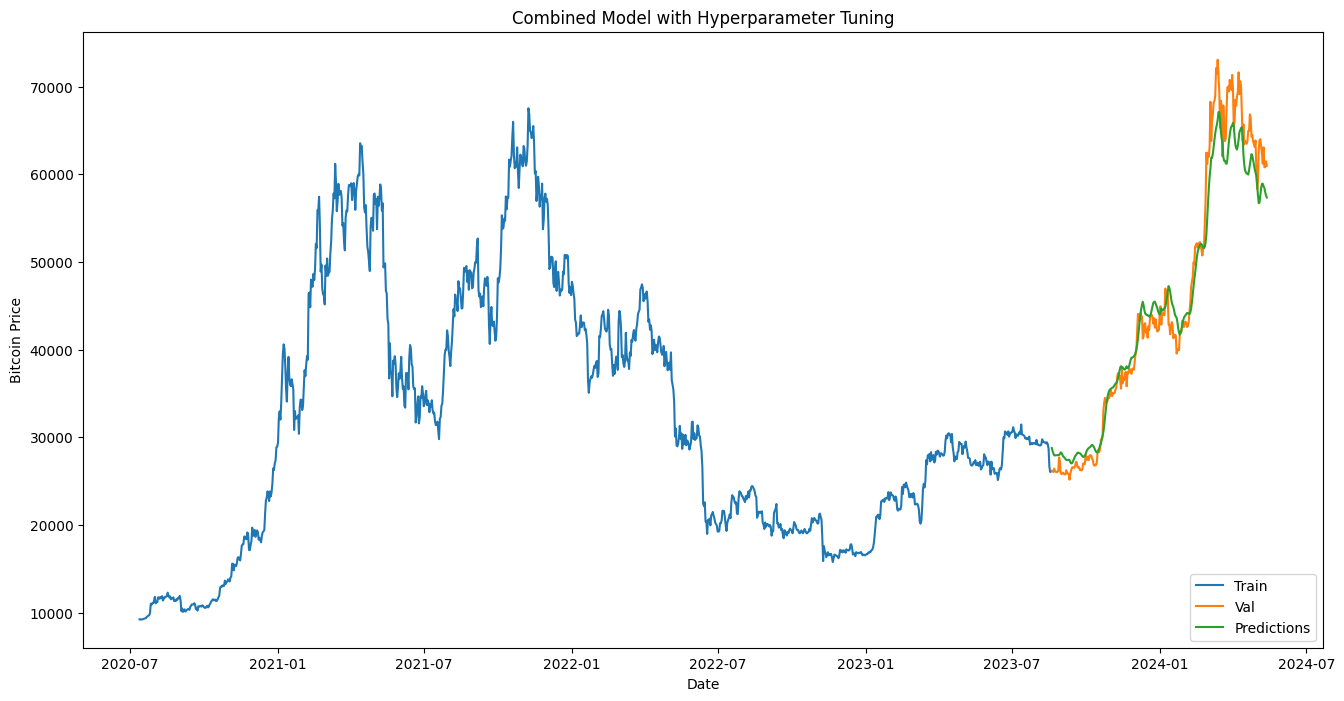

In [ ]:
# Plot the results
train = combinedna[:split+seq_length]
valid = combinedna[split+seq_length:]
valid['Predictions'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Combined Model with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['BTC_Price'])
plt.plot(valid[['BTC_Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

##Hyperparameter Tuning

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', min_value=25, max_value=200, step=25),
                   return_sequences=True,
                   input_shape=(x_train2.shape[1], x_train2.shape[2])))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=25, max_value=200, step=25),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='crypto_price_prediction'
)

In [ ]:
tuner.search_space_summary()


Search space summary
Default search space size: 6
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
dropout2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 25, 'max_value': 100, 'step': 25, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner.search(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

Trial 10 Complete [00h 04m 41s]
val_loss: 0.0003059839364141226

Best val_loss So Far: 0.00019855120626743883
Total elapsed time: 00h 40m 57s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Display the best hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units1')}.
The optimal dropout rate for the first layer is {best_hps.get('dropout1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units2')}.
The optimal dropout rate for the second layer is {best_hps.get('dropout2')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 200.
The optimal dropout rate for the first layer is 0.2.
The optimal number of units in the second LSTM layer is 150.
The optimal dropout rate for the second layer is 0.30000000000000004.
The optimal number of units in the dense layer is 25.
The optimal optimizer is rmsprop.



In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

# Save the model
model.save('combined_lstm_model_tuned.h5')

Epoch 1/50
27/27 [==============================] - 17s 271ms/step - loss: 0.1785 - val_loss: 0.0019
Epoch 2/50
27/27 [==============================] - 9s 328ms/step - loss: 0.0164 - val_loss: 0.0024
Epoch 3/50
27/27 [==============================] - 6s 236ms/step - loss: 0.0137 - val_loss: 0.0036
Epoch 4/50
27/27 [==============================] - 9s 325ms/step - loss: 0.0121 - val_loss: 0.0013
Epoch 5/50
27/27 [==============================] - 6s 230ms/step - loss: 0.0097 - val_loss: 0.0111
Epoch 6/50
27/27 [==============================] - 9s 327ms/step - loss: 0.0094 - val_loss: 0.0018
Epoch 7/50
27/27 [==============================] - 6s 235ms/step - loss: 0.0076 - val_loss: 0.0017
Epoch 8/50
27/27 [==============================] - 9s 328ms/step - loss: 0.0060 - val_loss: 0.0010
Epoch 9/50
27/27 [==============================] - 6s 234ms/step - loss: 0.0068 - val_loss: 6.5332e-04
Epoch 10/50
27/27 [==============================] - 9s 320ms/step - loss: 0.0054 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(
    np.concatenate((predictions2, np.zeros((predictions2.shape[0], scaled_data2.shape[1] - 1))), axis=1)
)[:, 0]


9/9 [==============================] - 1s 69ms/step


In [ ]:
y_test_actual2 = scaler.inverse_transform(np.concatenate((y_test2.reshape(-1, 1), np.zeros((y_test2.shape[0], scaled_data2.shape[1]-1))), axis=1))[:, 0]

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual2, predictions2)
mae = mean_absolute_error(y_test_actual2, predictions2)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Best Tuned Model Metrics:
MSE: 4478553.627312586
MAE: 1708.3864171780906
RMSE: 2116.259347838205


<ipython-input-52-61a171c0fc48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


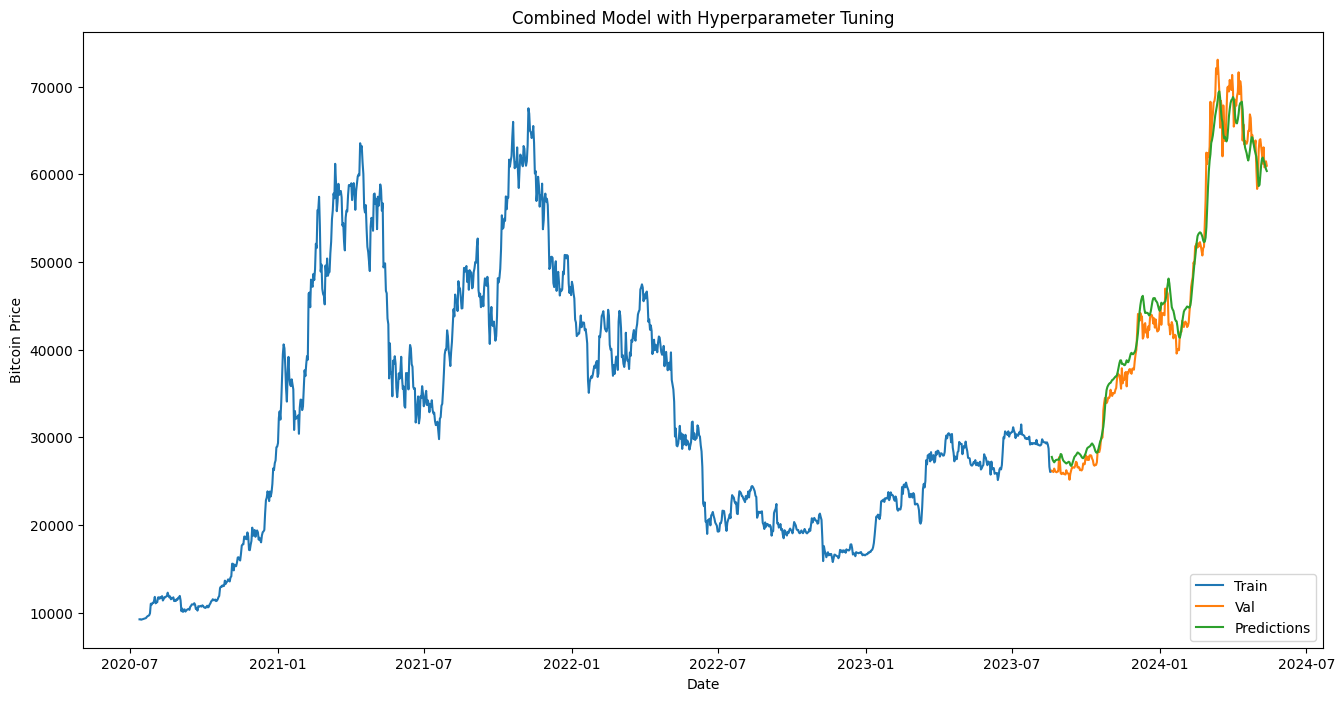

In [ ]:
# Plot the results
train = combinedna[:split+seq_length]
valid = combinedna[split+seq_length:]
valid['Predictions'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Combined Model with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['BTC_Price'])
plt.plot(valid[['BTC_Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#5 Dataset RNN Model



Epoch 1/50
27/27 [==============================] - 4s 49ms/step - loss: 0.5404 - val_loss: 0.0101
Epoch 2/50
27/27 [==============================] - 1s 33ms/step - loss: 0.1708 - val_loss: 0.0041
Epoch 3/50
27/27 [==============================] - 1s 33ms/step - loss: 0.1033 - val_loss: 0.0016
Epoch 4/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0703 - val_loss: 0.0022
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0468 - val_loss: 8.9642e-04
Epoch 6/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0360 - val_loss: 0.0031
Epoch 7/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0275 - val_loss: 8.9842e-04
Epoch 8/50
27/27 [==============================] - 1s 32ms/step - loss: 0.0229 - val_loss: 0.0012
Epoch 9/50
27/27 [==============================] - 1s 34ms/step - loss: 0.0174 - val_loss: 5.0896e-04
Epoch 10/50
27/27 [==============================] - 1s 33ms/step - loss: 0.0160 - val_loss: 6.59

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 10ms/step
Best Tuned Model Metrics:
MSE: 12586817.533691904
MAE: 2741.329976563642
RMSE: 3547.7905143471908


<ipython-input-60-a8464dcd697b>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


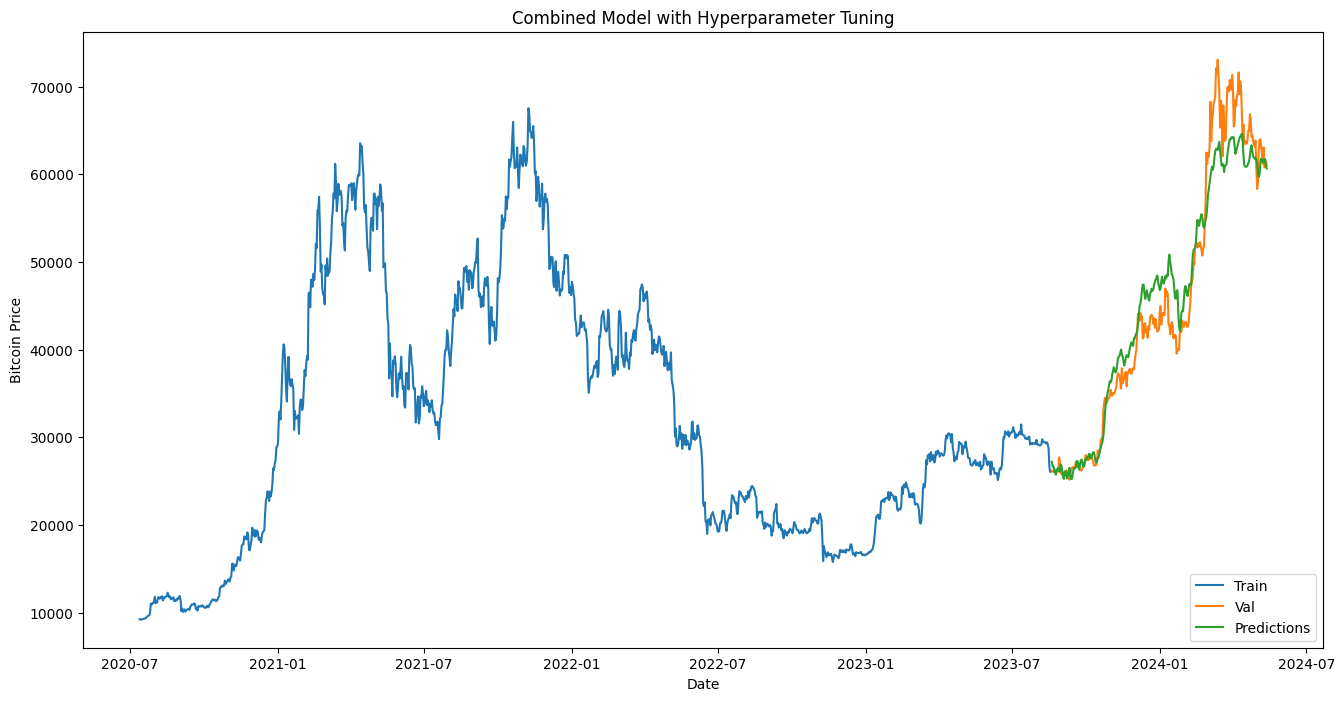

In [ ]:
# Normalize the combined data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(combinedna)

# Create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Price'
    return np.array(x), np.array(y)

# Create sequences from the combined data
seq_length = 60
x2, y2 = create_sequences(scaled_data2, seq_length)

# Split into training and testing sets
split = int(0.8 * len(x2))
x_train2, x_test2 = x2[:split], x2[split:]
y_train2, y_test2 = y2[:split], y2[split:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train2.shape[1], x_train2.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

# Save the model
model.save('combined_rnn_model.h5')

# Make predictions
predictions2 = model.predict(x_test2)

# Inverse transform the predictions
predictions2 = scaler.inverse_transform(
    np.concatenate((predictions2, np.zeros((predictions2.shape[0], scaled_data2.shape[1] - 1))), axis=1)
)[:, 0]

y_test_actual2 = scaler.inverse_transform(np.concatenate((y_test2.reshape(-1, 1), np.zeros((y_test2.shape[0], scaled_data2.shape[1]-1))), axis=1))[:, 0]

# Calculate metrics
mse = mean_squared_error(y_test_actual2, predictions2)
mae = mean_absolute_error(y_test_actual2, predictions2)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

# Plot the results
train = combinedna[:split+seq_length]
valid = combinedna[split+seq_length:]
valid['Predictions'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Combined Model with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['BTC_Price'])
plt.plot(valid[['BTC_Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Hyperparameter Tuning
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('units1', min_value=25, max_value=200, step=25),
                        return_sequences=True,
                        input_shape=(x_train2.shape[1], x_train2.shape[2])))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(SimpleRNN(units=hp.Int('units2', min_value=25, max_value=200, step=25),
                        return_sequences=False))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='crypto_price_prediction'
)

tuner.search_space_summary()

tuner.search(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first RNN layer is {best_hps.get('units1')}.
The optimal dropout rate for the first layer is {best_hps.get('dropout1')}.
The optimal number of units in the second RNN layer is {best_hps.get('units2')}.
The optimal dropout rate for the second layer is {best_hps.get('dropout2')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

# Save the model
model.save('combined_rnn_model_tuned.h5')

predictions2 = model.predict(x_test2)
predictions2 = scaler.inverse_transform(
    np.concatenate((predictions2, np.zeros((predictions2.shape[0], scaled_data2.shape[1] - 1))), axis=1)
)

Trial 10 Complete [00h 02m 25s]
val_loss: 0.00017879759252537042

Best val_loss So Far: 0.00014699567691423
Total elapsed time: 00h 17m 45s

The hyperparameter search is complete. The optimal number of units in the first RNN layer is 175.
The optimal dropout rate for the first layer is 0.30000000000000004.
The optimal number of units in the second RNN layer is 50.
The optimal dropout rate for the second layer is 0.5.
The optimal number of units in the dense layer is 25.
The optimal optimizer is rmsprop.

Epoch 1/50
27/27 [==============================] - 4s 70ms/step - loss: 0.5663 - val_loss: 0.0747
Epoch 2/50
27/27 [==============================] - 2s 58ms/step - loss: 0.1502 - val_loss: 0.0139
Epoch 3/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0653 - val_loss: 8.3620e-04
Epoch 4/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0243 - val_loss: 0.0134
Epoch 5/50
27/27 [==============================] - 2s 88ms/step - loss: 0.0249 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 15ms/step


In [ ]:
y_test_actual2 = scaler.inverse_transform(np.concatenate((y_test2.reshape(-1, 1), np.zeros((y_test2.shape[0], scaled_data2.shape[1]-1))), axis=1))[:, 0]

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_actual2, predictions2)
mae = mean_absolute_error(y_test_actual2, predictions2)
rmse = np.sqrt(mse)

print(f"Best Tuned Model Metrics:\nMSE: {mse}\nMAE: {mae}\nRMSE: {rmse}")

Best Tuned Model Metrics:
MSE: 14628379.870039139
MAE: 3365.246399151127
RMSE: 3824.7065076995304


<ipython-input-67-61a171c0fc48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


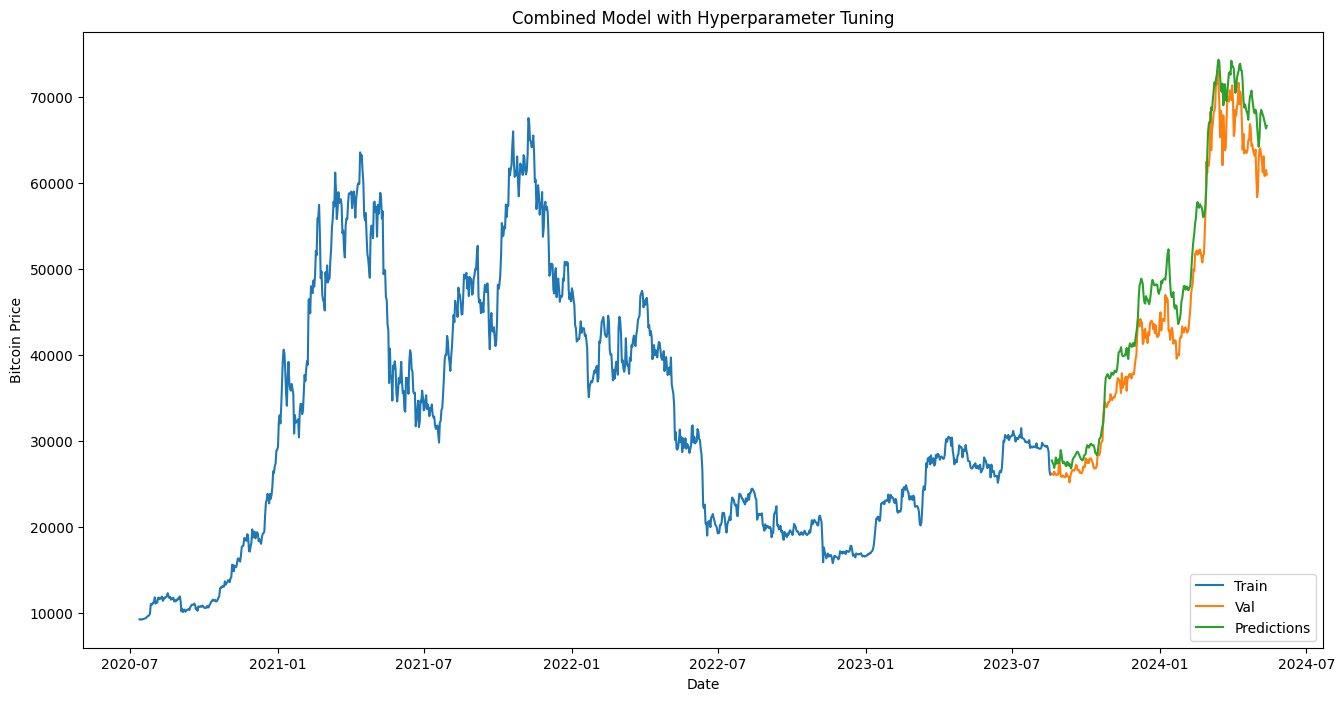

In [ ]:
# Plot the results
train = combinedna[:split+seq_length]
valid = combinedna[split+seq_length:]
valid['Predictions'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Combined Model with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.plot(train['BTC_Price'])
plt.plot(valid[['BTC_Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train2.shape[1], x_train2.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            3800      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 10151 (39.65 KB)
Trainable params: 10151